In [1]:
import numpy as np
import os
import astropy.io.fits as fits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
work_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_varZ_v4.2eq_CB16MILES_ChFall/'
f_name=work_dir+'sandage_varZ_v4.2eq_spec_dcomb0p25null_001.fits'
f_name2=work_dir+'sandage_varZ_v4.2eq_spec_dcomb0p25null_002.fits'

hdul=fits.open(f_name)
hdul2=fits.open(f_name2)

N=np.size(hdul[0].data)

In [3]:
y_data=hdul[1].data
y_data2=hdul2[1].data

wl=hdul[0].data

In [4]:
#sel_wl=(wl<25000) & (wl>2500)
sel_wl=(wl<8500) & (wl>3500)

wl=wl[sel_wl]
y_data=y_data[...,sel_wl]
y_data2=y_data2[...,sel_wl]

N_wl=np.size(wl)
N_models=np.size(hdul[1].data, axis=0)
norm=np.zeros(N_models)
norm2=np.zeros(N_models)

d_wl=np.zeros(np.size(wl)-1)
wl_grid=np.zeros(np.size(wl)-1)
y_interp=np.zeros(np.size(wl)-1)
y_interp2=np.zeros(np.size(wl)-1)

In [5]:
for i_wl in range (0, np.size(wl)-1):
    d_wl[i_wl]=wl[i_wl+1]-wl[i_wl]
    wl_grid[i_wl]=(wl[i_wl+1]+wl[i_wl])/2.0
        
for i_mod in range(0, N_models):
    y_interp=np.interp(wl_grid, wl, y_data[i_mod, ...])
    norm[i_mod]=np.dot(y_interp, d_wl)
    y_interp2=np.interp(wl_grid, wl, y_data2[i_mod, ...])
    norm2[i_mod]=np.dot(y_interp2, d_wl)

In [6]:
for i_model in range(0, N_models):
    y_data[i_model, ...]=y_data[i_model, ...]/norm[i_model]
    y_data2[i_model, ...]=y_data2[i_model, ...]/norm2[i_model]

In [8]:
y=StandardScaler().fit_transform(y_data)
y2=StandardScaler().fit_transform(y_data2)

In [9]:
pc=100
pca=PCA(n_components=pc)

In [10]:
y_proj=pca.fit_transform(y)

In [15]:
np.shape(y2)

(12500, 5462)

In [13]:
np.shape(y_proj)

(12500, 100)

In [16]:
N_PC=70
PC=pca.components_[0:N_PC,...]

In [18]:
y_proj2=np.dot(y2,np.transpose(PC))

In [19]:
y_new=(np.dot(y_proj[...,0:N_PC], PC)*np.std(y_data, axis=0)+np.mean(y_data, axis=0))
y_new2=(np.dot(y_proj2[...,0:N_PC], PC)*np.std(y_data2, axis=0)+np.mean(y_data2, axis=0))

In [20]:
np.shape(pca.components_)

(100, 5462)

Text(0, 0.5, '$f_{true}/f_{bol}$')

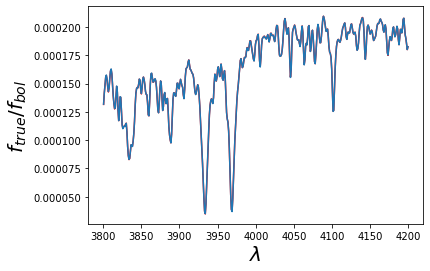

In [21]:
idx=139 #139
selected=(wl>3800)&(wl<4200)

import matplotlib.pyplot as plt
plt.plot(wl[selected], (y_data[idx,selected]), color='red')
plt.plot(wl[selected],(y_new[idx,selected]))
plt.xlabel(r'$\lambda$', size=20)
plt.ylabel(r'$f_{true}/f_{bol}$',size=20)

Text(0, 0.5, '$f_{true}/f_{bol}$')

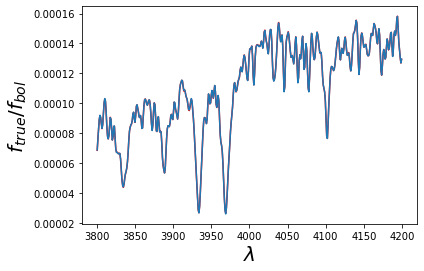

In [22]:
idx=139 #139
selected=(wl>3800)&(wl<4200)

import matplotlib.pyplot as plt
plt.plot(wl[selected], (y_data2[idx,selected]), color='red')
plt.plot(wl[selected],(y_new2[idx,selected]))
plt.xlabel(r'$\lambda$', size=20)
plt.ylabel(r'$f_{true}/f_{bol}$',size=20)

Text(0.5, 1.0, '$PC=$100')

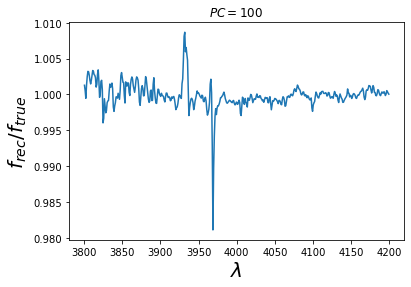

In [23]:
plt.plot(wl[selected], y_new[idx,selected]/y_data[idx,selected])
plt.xlabel(r'$\lambda$', size=20)
plt.ylabel(r'$f_{rec}/f_{true}$', size=20)
plt.title(r'$PC=$'+str(pc))

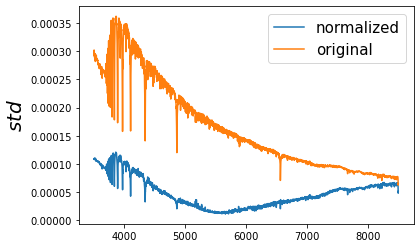

In [24]:
plt.plot(wl,np.std(y_data,axis=0), label='normalized')
plt.plot(wl,np.std(hdul[1].data[...,sel_wl],axis=0), label='original')
plt.ylabel(r'$std$', size=20)
plt.legend(loc='upper right', fontsize=15)

In [29]:

rapp=y_new/y_data
diff=(y_new-y_data)/np.mean(y_data, axis=0)

rapp2=y_new2/y_data2
diff2=(y_new2-y_data2)/np.mean(y_data2, axis=0)

In [30]:
statistic2=np.percentile(diff2, [2.5, 16,50, 84, 97.5], axis=0)
statistic=np.percentile(diff, [2.5, 16,50, 84, 97.5], axis=0)

In [31]:
np.shape(statistic)

(5, 5462)

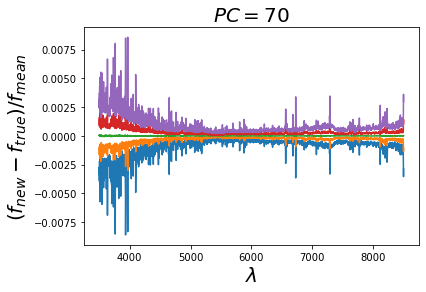

In [34]:
sel=(wl>3900)&(wl<4000)
plt.plot(wl, statistic[0,...])
plt.plot(wl, statistic[1,...])
plt.plot(wl, statistic[2,...])
plt.plot(wl, statistic[3,...])
plt.plot(wl, statistic[4,...])
plt.ylabel(r'$(f_{new}-f_{true})/f_{mean}$', size=20)
plt.xlabel(r'$\lambda$', size=20)
plt.title(r'$PC=$'+str(N_PC), size=20)
plt.savefig('/home/edoardo/Desktop/TESI/pca/pc'+str(N_PC)+'.png')

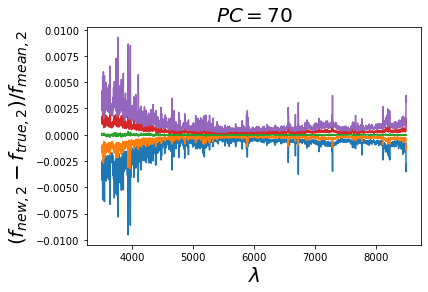

In [35]:
sel=(wl>3900)&(wl<4000)
plt.plot(wl, statistic2[0,...])
plt.plot(wl, statistic2[1,...])
plt.plot(wl, statistic2[2,...])
plt.plot(wl, statistic2[3,...])
plt.plot(wl, statistic2[4,...])
plt.ylabel(r'$(f_{new,2}-f_{true,2})/f_{mean,2}$', size=20)
plt.xlabel(r'$\lambda$', size=20)
plt.title(r'$PC=$'+str(N_PC), size=20)
plt.savefig('/home/edoardo/Desktop/TESI/pca/pc'+str(N_PC)+'_2ndchunk.png')

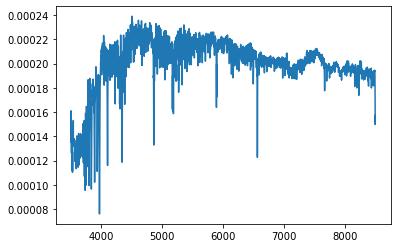

In [27]:
plt.plot(wl, np.mean(y_data, axis=0))

In [136]:
np.shape(diff)

(12500, 5462)

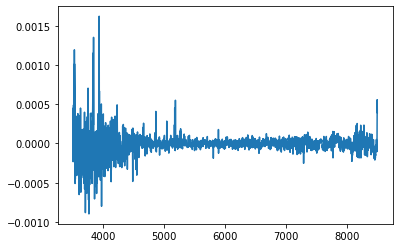

In [145]:
plt.plot(wl,diff[0])

In [148]:
np.shape(np.mean(diff, axis=0))

(5462,)